# SciPy

SciPy is almost like a superpowered version of NumPy. It takes NumPy and then adds a lot of functionality from different fields of study, such as statistics, signal processing and computer vision.

# PDF and CDF

Probability density function (PDF) of a continuous random variable is a function whose value at any given sample (or point) in the sample space (the set of possible values taken by the random variable) can be interpreted as providing a relative likelihood that the value of the random variable would be close to that sample.

Cumulative distribution function (CDF) of random variable $X$, evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$. 

To calculate the PDF in the CDF under the normal distribution, we are going to start by importing sumbodule of SciPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

So if you're interested in some different distribution, like the beta or the gamma, you would just do it `from scipy.stats import beta` or `from scipy.stats import gamma`. The API for these modules is similar.

Next, we're going to generate our X values.

In [2]:
x = np.linspace(-6, 6, 1000)

Next, we're going to calculate the PDF of these X values under the standers normal distribution. For the normal distribution, the location parameter is the mean and the scale parameter is the standard deviation.

In [3]:
fx = norm.pdf(x, loc=0, scale=1)

Next, we can plot the PDF

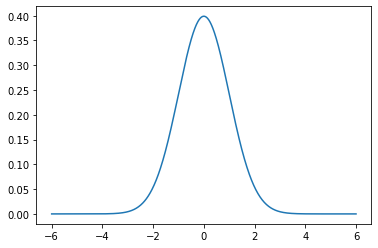

In [4]:
plt.plot(x, fx);

Next, we're going to calculate the CDF.

In [5]:
Fx = norm.cdf(x, loc=1, scale=1)

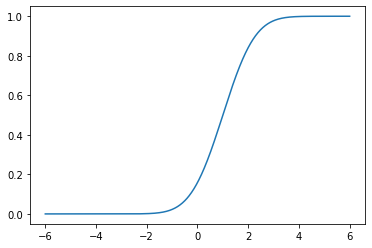

In [6]:
plt.plot(x, Fx)

# Convolution

Convolution is a very common operation in many fields, such as deep learning, signal processing, digital image processing and statistics. Here, we will apply convolution to an image to create a blurring filter.

In [7]:
from PIL import Image

In [8]:
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

--2021-11-12 12:46:05--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png’

Lenna_(test_image). 100%[===================>] 462.73K  --.-KB/s    in 0.1s    

2021-11-12 12:46:06 (3.87 MB/s) - ‘Lenna_(test_image).png’ saved [473831/473831]



In [9]:
im = Image.open('Lenna_(test_image).png')

Now, we are going to convert the image to grayscale. We can do it by taking the mean accross the color channels.

In [10]:
gray = np.mean(im, axis=2)

As a side note, two dimensional convolution is defined for two dimensional images, so we don't want that third color dimension, at least not at this stage.

Next, we're going to create a two dimensional Gaussian filter. This makes use of the PDF.

In [11]:
x = np.linspace(-6, 6, 50)
fx = norm.pdf(x, loc=0, scale=1)

The Gaussian filter is basically a two dimensional spherical Gaussian with some constants that we're going to ignore.

![Gaussian filter](https://github.com/katarinagresova/DeepLearningPrerequisites/raw/master/assets/images/gaussian_filter.png)

A simple way to calculate this is just to do the outer product of `fx` with itself.

In [12]:
filt = np.outer(fx, fx)

And if we plot a filter as an image, it should look like a glowing ball.

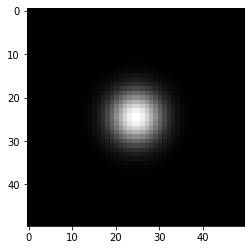

In [13]:
plt.imshow(filt, cmap='gray');

Next, we are going to import `convolve2d` function from `scipy`.

In [14]:
from scipy.signal import convolve2d

Next, we're going to apply this function to our image and our filter.

In [15]:
out = convolve2d(gray, filt)

Finally, we're going to plot both the original image and our blurred image side by side. In order to do that, we can use subplots. 

General form: `plt.subplot(#rows, #columns, position)`

This means that I want a #rows by #columns grid of plots and right now I plan to plot the thing that goes in the selected position.

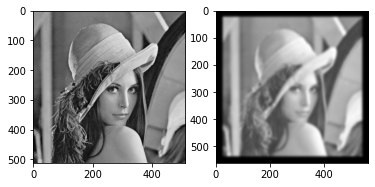

In [16]:
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray')
plt.plot();

We just use convolution to achieve a blurring effect using a Gaussian filter.

# Exercise: Edge detection

- define 2 filters:
  - $H_x = \begin{pmatrix}
1 & 0 & -1\\
2 & 0 & -2\\
1 & 0 & -1
\end{pmatrix}$
  - $H_y = \begin{pmatrix}
1 & 2 & 1\\
0 & 0 & 0\\
-1 & -2 & -1
\end{pmatrix}$
- do convolution using both of these filters on a grayscale image
- call the output $G_x$ and $G_y$
- combine $G_x$ and $G_y$ by squaring them, adding them together and then taking the quare root
  - $G = \sqrt{{G_x}^2 + {G_y}^2} $
  - these operations should be performed element-wise

In [28]:
hx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
hx

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [29]:
hy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
hy

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

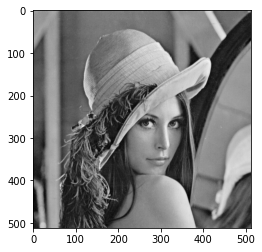

In [30]:
im = Image.open('Lenna_(test_image).png')
gray = np.mean(im, axis=2)
plt.imshow(gray, cmap='gray');

In [31]:
gx = convolve2d(gray, hx)
gy = convolve2d(gray, hy)

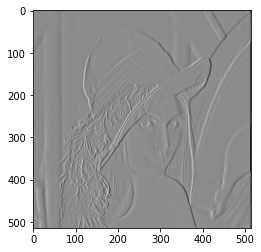

In [32]:
plt.imshow(gx, cmap='gray');

In [33]:
g = np.sqrt(gx**2 + gy**2)

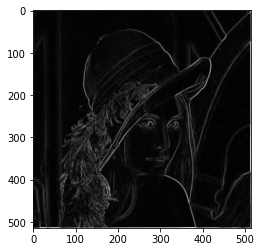

In [34]:
plt.imshow(g, cmap='gray');